In [1]:
import scipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file = scipy.io.loadmat('../data/pratica_2/Dados.mat')

In [3]:
file

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Tue Sep 29 01:15:03 2015',
 '__version__': '1.0',
 '__globals__': [],
 'SINAL': array([[ 49.33333206, -14.38095284, -33.23809433, ...,  -8.38095284,
         -32.        ,  81.23809814],
        [ 32.57143021,  67.14286041,  57.1428566 , ..., -47.61904907,
          -5.71428585,  17.61904716],
        [-19.33333397,  21.1428566 ,  -7.42857122, ...,  58.19047546,
          91.90476227,  29.90476227],
        ...,
        [  7.61904764,   2.        ,   8.5714283 , ...,  13.52380943,
           3.23809528,  -0.19047619],
        [  1.42857146,  -4.19047642,   1.61904764, ...,  -5.80952358,
          -8.5714283 , -10.85714245],
        [-12.66666698, -16.8571434 , -15.04761887, ...,  -7.04761887,
           6.66666651,   6.57142878]]),
 'ESTAGIOS': array([[0],
        [0],
        [0],
        ...,
        [5],
        [5],
        [5]], dtype=uint8)}

In [4]:
signal = file.get("SINAL")
estagios = file.get("ESTAGIOS")

In [5]:
df = pd.DataFrame(signal)

In [6]:
vigilia = sum([1 for i in estagios if i[0] == 0])
estagio1 = sum([1 for i in estagios if i[0] == 1])
estagio2 = sum([1 for i in estagios if i[0] == 2])
estagio3 = sum([1 for i in estagios if i[0] == 3])
estagio4 = sum([1 for i in estagios if i[0] == 4])
rem = sum([1 for i in estagios if i[0] == 5])

In [7]:
df_vigilia = df.iloc[:vigilia]
df_estagio1 = df.iloc[vigilia:vigilia+estagio1]
df_estagio2 = df.iloc[vigilia+estagio1:vigilia+estagio1+estagio2]
df_estagio3 = df.iloc[vigilia+estagio1+estagio2:vigilia+estagio1+estagio2+estagio3]
df_estagio4 = df.iloc[vigilia+estagio1+estagio2+estagio3:vigilia+estagio1+estagio2+estagio3+estagio4]
df_rem = df.iloc[vigilia+estagio1+estagio2+estagio3+estagio4:]

In [12]:
df_vigilia.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,49.333332,-14.380953,-33.238094,-18.476191,37.142857,-40.380951,34.190475,-80.285713,-83.238098,-60.857143,...,-12.380953,-4.380952,8.095238,37.523811,28.380953,-14.285714,40.000000,-8.380953,-32.000000,81.238098
1,32.571430,67.142860,57.142857,59.523811,73.428574,13.142858,13.714286,28.571428,14.285714,23.809525,...,5.809524,62.000000,-26.095238,-16.952381,-7.523809,-12.190476,-13.523809,-47.619049,-5.714286,17.619047
2,-19.333334,21.142857,-7.428571,30.190475,-30.190475,36.857143,-4.190476,3.142857,84.857140,-30.761906,...,65.047623,74.285713,62.857143,66.952377,50.761906,44.666668,31.619047,58.190475,91.904762,29.904762
3,10.190476,65.428574,66.285713,45.523811,-25.904762,31.142857,1.619048,43.619049,36.571430,56.000000,...,-50.000000,-38.095238,-39.904762,-36.000000,-40.476189,-20.761906,-31.047619,24.380953,-45.619049,-66.476189
4,-49.904762,-81.619049,-57.142857,-82.476189,-86.476189,-91.142860,-59.047619,-89.523811,-97.238098,-49.047619,...,-34.857143,-54.952381,-39.809525,-53.809525,-42.095238,-37.904762,-42.190475,-32.761906,-28.476191,-40.000000


In [9]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
0,49.333332,-14.380953,-33.238094,-18.476191,37.142857,-40.380951,34.190475,-80.285713,-83.238098,-60.857143,...,-12.380953,-4.380952,8.095238,37.523811,28.380953,-14.285714,40.000000,-8.380953,-32.000000,81.238098
1,32.571430,67.142860,57.142857,59.523811,73.428574,13.142858,13.714286,28.571428,14.285714,23.809525,...,5.809524,62.000000,-26.095238,-16.952381,-7.523809,-12.190476,-13.523809,-47.619049,-5.714286,17.619047
2,-19.333334,21.142857,-7.428571,30.190475,-30.190475,36.857143,-4.190476,3.142857,84.857140,-30.761906,...,65.047623,74.285713,62.857143,66.952377,50.761906,44.666668,31.619047,58.190475,91.904762,29.904762
3,10.190476,65.428574,66.285713,45.523811,-25.904762,31.142857,1.619048,43.619049,36.571430,56.000000,...,-50.000000,-38.095238,-39.904762,-36.000000,-40.476189,-20.761906,-31.047619,24.380953,-45.619049,-66.476189
4,-49.904762,-81.619049,-57.142857,-82.476189,-86.476189,-91.142860,-59.047619,-89.523811,-97.238098,-49.047619,...,-34.857143,-54.952381,-39.809525,-53.809525,-42.095238,-37.904762,-42.190475,-32.761906,-28.476191,-40.000000


In [10]:
df.shape

(1179, 3000)

In [14]:
from functions.pratica_2 import extraicarac

In [15]:
map_bandas = {'delta 1':[0.5,2.5],'delta 2':[2.5,4],'teta 1':[4,6],'teta 2':[6,8], 'alfa':[8,12],'beta':[12,20],'gama':[10,45]}
map_signal = {
    'vigilia':df_vigilia.to_numpy(),
    'estagio1':df_estagio1.to_numpy(),
    'estagio2':df_estagio2.to_numpy(),
    'estagio3':df_estagio3.to_numpy(),
    'estagio4':df_estagio4.to_numpy(),
    'rem':df_rem.to_numpy()
}
caracteristicas = { k:extraicarac(
    sin=v,
    freq=100,
    bandas=map_bandas
    ) for k,v in map_signal.items()
         }


In [18]:
pd_caracteristicas = {
    key: pd.DataFrame(caracteristicas.get(key)[0], columns=caracteristicas.get(key)[1])
        for key in caracteristicas.keys()
}

In [26]:
pd_caracteristicas.get('vigilia').head()

,media,variancia,mobilidade,complexidade,f-central,P na fc,l-banda,f-margem,delta 1,delta 2,teta 1,teta 2,alfa,beta,gama
0,1.295302,3591.029755,0.258407,1.609419,4.387903,7267.216549,9.332367,9.673115,0.485252,0.138222,0.047653,0.014754,0.014003,0.021298,0.085777
1,1.279238,2777.562199,0.502120,1.566151,7.359634,17.292234,12.391938,29.853235,0.466488,0.103914,0.059210,0.026475,0.021209,0.035083,0.166230
2,1.767746,3180.684516,0.774581,1.488255,10.675996,731.030542,14.468879,37.424950,0.362176,0.103633,0.073534,0.033402,0.032366,0.052597,0.258526
3,-0.008063,4902.544936,0.708590,1.510034,9.802107,183.865469,14.115268,35.790527,0.433336,0.132193,0.061152,0.028991,0.027282,0.048401,0.231153
4,1.254317,1286.797516,0.485813,1.556413,7.011548,681.589390,12.244632,28.852568,0.422646,0.092128,0.037807,0.027021,0.029797,0.037171,0.167879


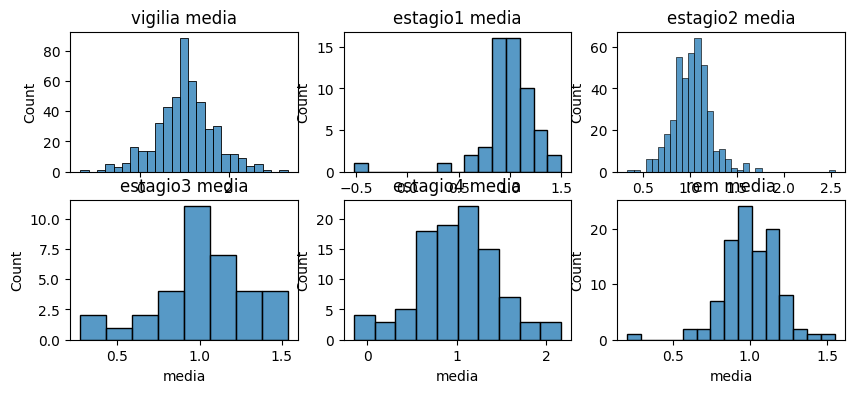

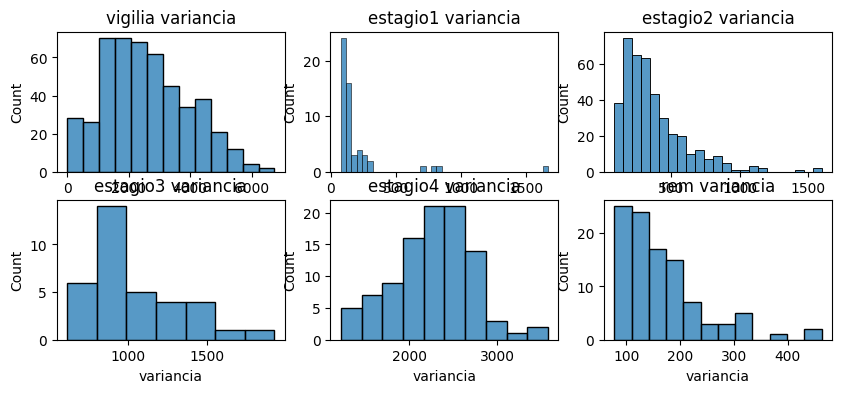

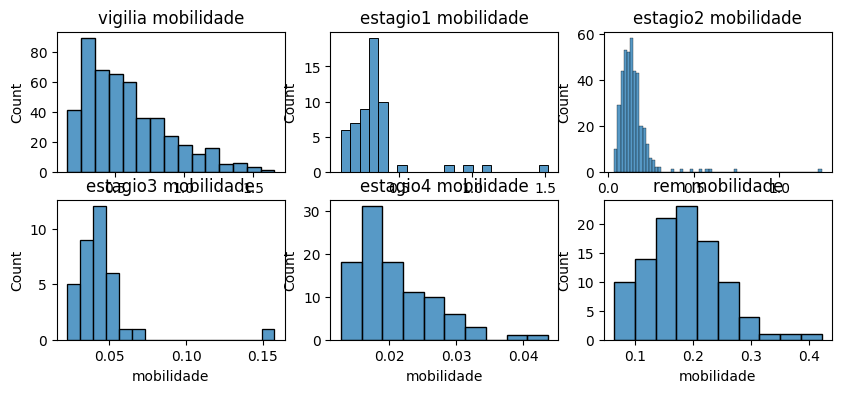

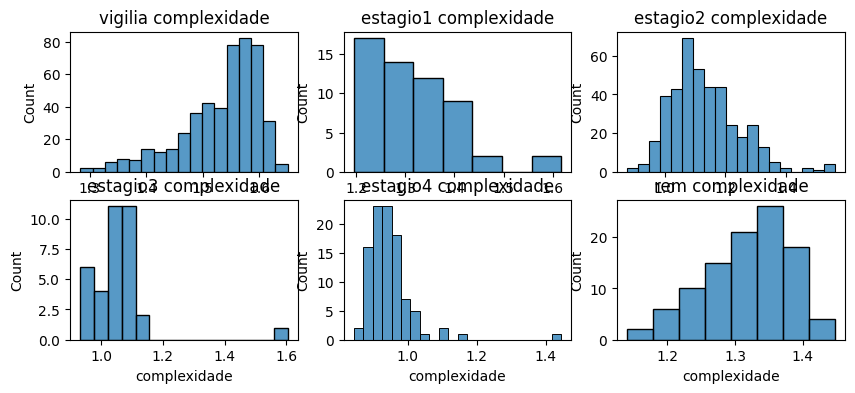

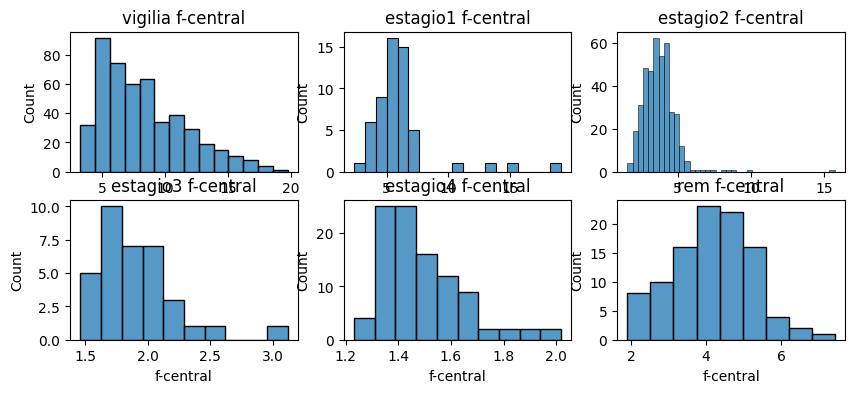

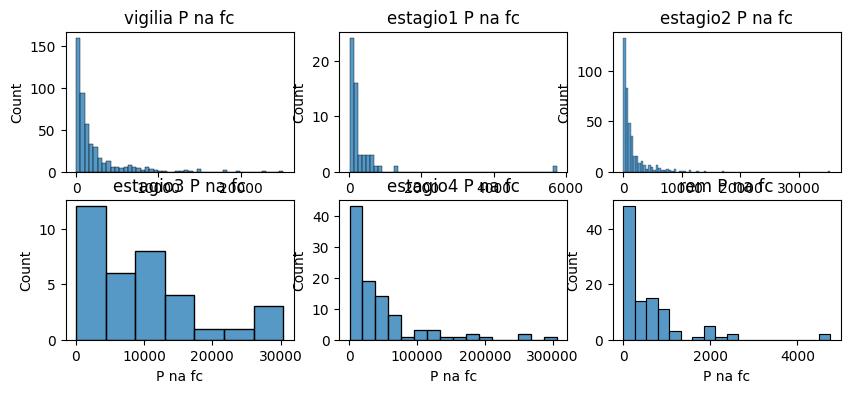

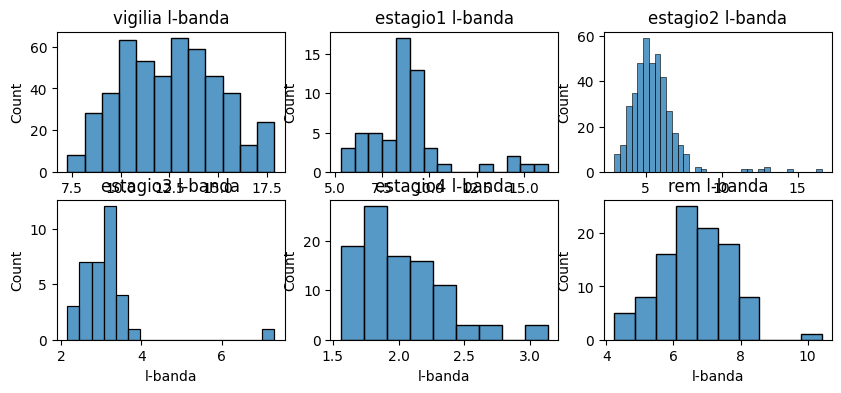

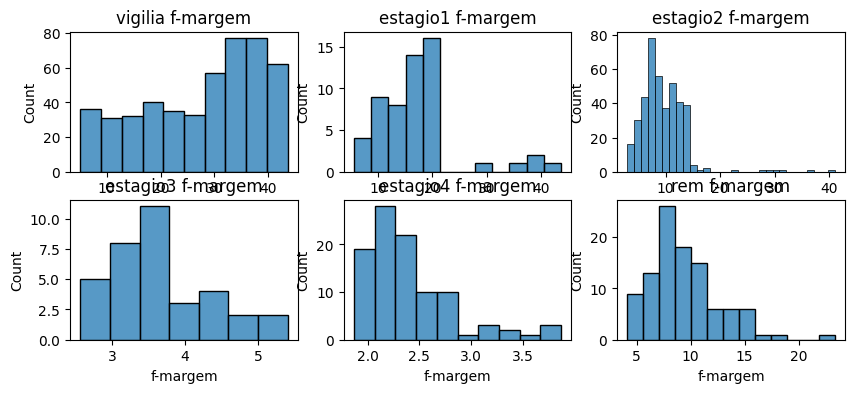

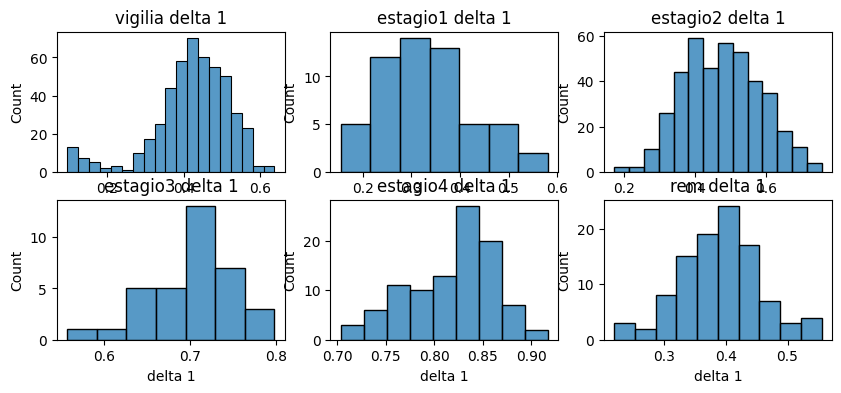

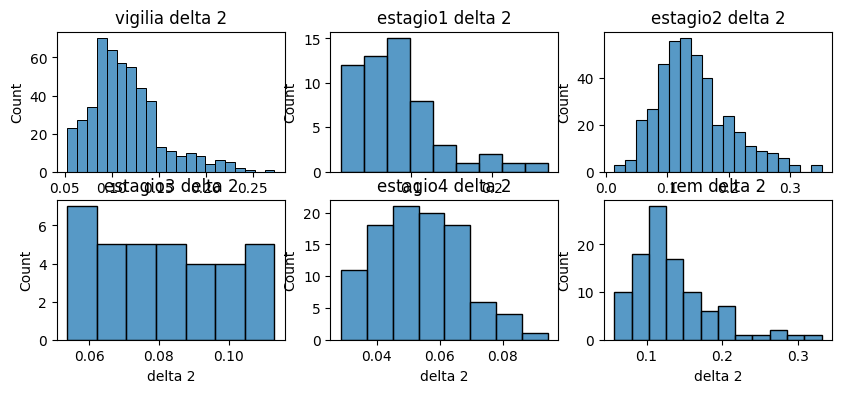

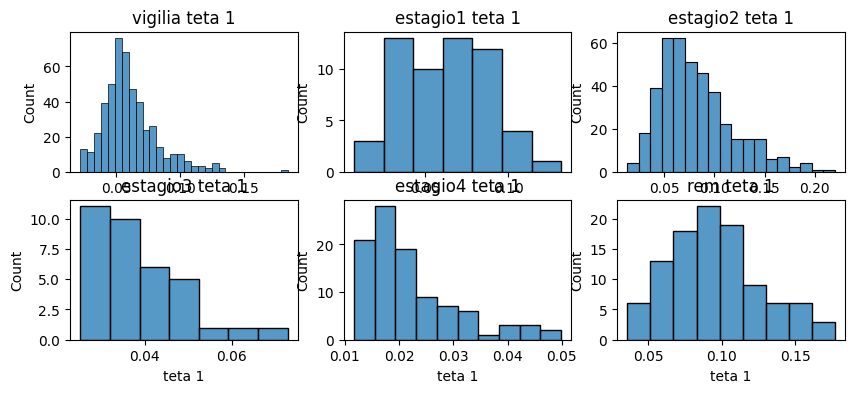

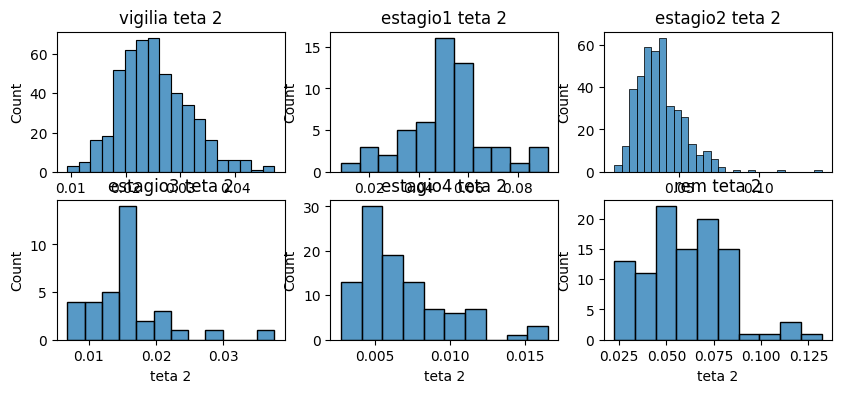

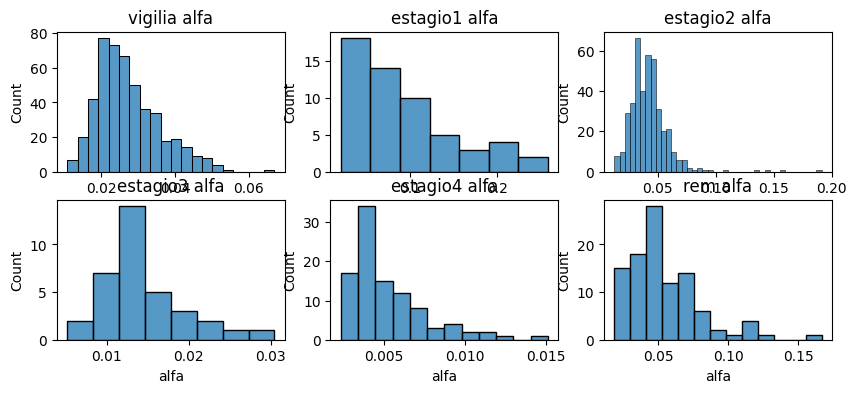

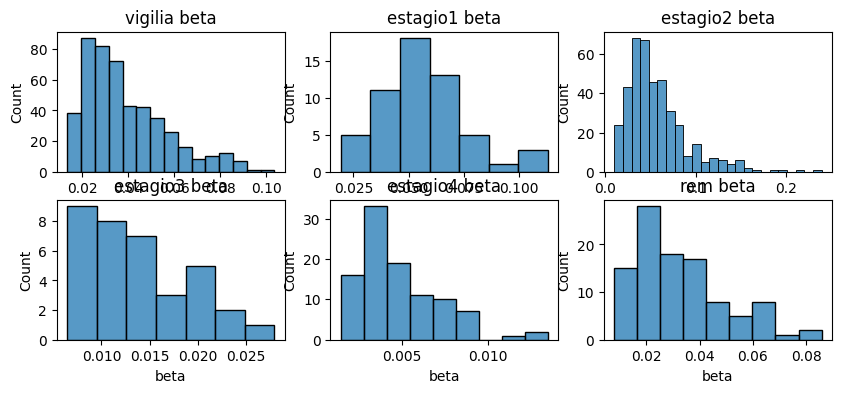

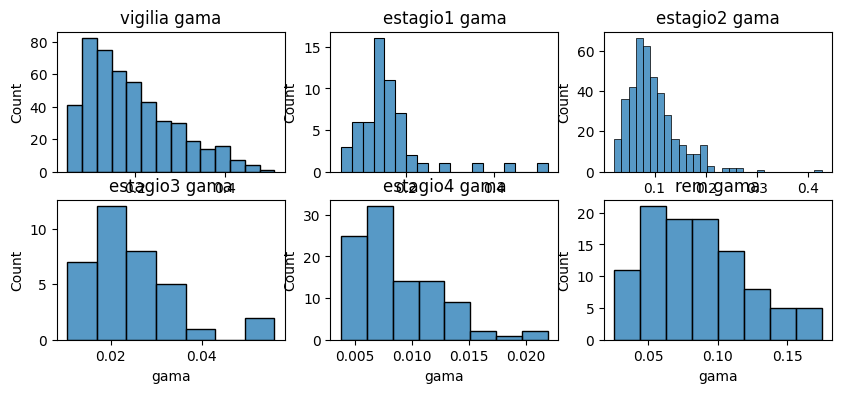

In [15]:
for key in pd_caracteristicas.get('vigilia').columns:
    _, axes = plt.subplots(2, 3, sharey=False, figsize=(10, 4))
    for index, value in enumerate(pd_caracteristicas.values()):
        sns.histplot(data=value, x=key, ax=axes[index//3, index%3])
        axes[index//3, index%3].set_title(list(pd_caracteristicas.keys())[index] + ' ' + key)


<AxesSubplot: xlabel='mobilidade', ylabel='complexidade'>

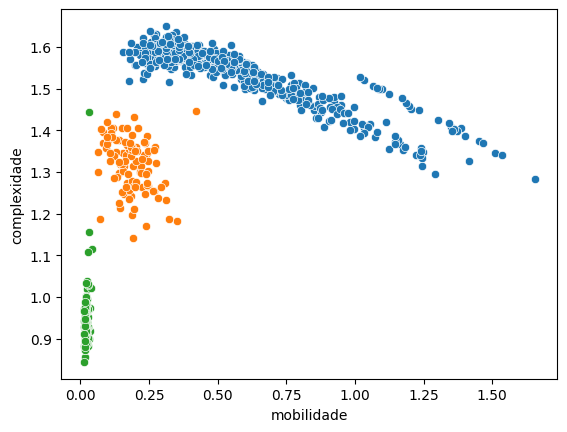

In [18]:
sns.scatterplot(data=pd_caracteristicas.get('vigilia'), x='mobilidade', y='complexidade')
sns.scatterplot(data=pd_caracteristicas.get('rem'), x='mobilidade', y='complexidade')
sns.scatterplot(data=pd_caracteristicas.get('estagio4'), x='mobilidade', y='complexidade')




In [19]:
%pip install Qt5Agg

Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement Qt5Agg (from versions: none)
ERROR: No matching distribution found for Qt5Agg
Note: you may need to restart the kernel to use updated packages.


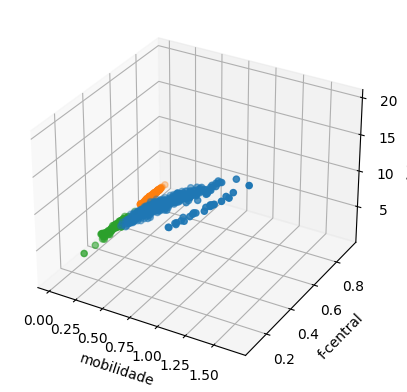

In [21]:

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

x = pd_caracteristicas.get('vigilia')['mobilidade']
y = pd_caracteristicas.get('vigilia')['delta 1']
z = pd_caracteristicas.get('vigilia')['f-central']

ax.set_xlabel("mobilidade")
ax.set_ylabel("f-central")
ax.set_zlabel("delta 1")

ax.scatter(x, y, z)
x = pd_caracteristicas.get('estagio4')['mobilidade']
y = pd_caracteristicas.get('estagio4')['delta 1']
z = pd_caracteristicas.get('estagio4')['f-central']
ax.scatter(x, y, z)
x = pd_caracteristicas.get('rem')['mobilidade']
y = pd_caracteristicas.get('rem')['delta 1']
z = pd_caracteristicas.get('rem')['f-central']
ax.scatter(x, y, z)


plt.show()

